In [157]:
# Purpose of the exercise - how to estimate the Fama French Carhart four-factor risk model exposures for an arbitrary stock using live data in Python. 
# Cover the process and common pitfalls of pulling in live data from the Fama-French risk factor database and from Yahoo Finance, and 
# running a factor sensitivity estimation using linear regression.

In [158]:
import pandas_datareader

In [159]:
import matplotlib.pyplot as plt

In [160]:
#Selecting the Famafrench model
pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [161]:
start = '2000-01-01'

In [162]:
#importing the data from fama french research data factor model from jan 1st, 2000 to november 30th,2022
ff = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq ='M',start = start).read()

In [163]:
ff

{0:          Mkt-RF    SMB   HML    RF
 Date                              
 2000-01   -4.74   5.79 -1.91  0.41
 2000-02    2.45  21.42 -9.70  0.43
 2000-03    5.20 -17.23  8.17  0.47
 2000-04   -6.40  -6.68  7.26  0.46
 2000-05   -4.42  -6.09  4.81  0.50
 ...         ...    ...   ...   ...
 2022-07    9.57   2.81 -4.10  0.08
 2022-08   -3.77   1.39  0.31  0.19
 2022-09   -9.35  -0.82  0.03  0.19
 2022-10    7.83   0.10  8.05  0.23
 2022-11    4.60  -3.40  1.39  0.29
 
 [275 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 2000  -17.60  -4.60  44.99  5.89
 2001  -15.21  18.13  18.54  3.83
 2002  -22.76   4.40   8.16  1.65
 2003   30.75  26.78   4.97  1.02
 2004   10.72   4.45   7.63  1.20
 2005    3.09  -2.36   9.41  2.98
 2006   10.60   0.09  11.92  4.80
 2007    1.04  -7.36 -17.28  4.66
 2008  -38.34   2.44   1.00  1.60
 2009   28.26   9.18  -9.65  0.10
 2010   17.37  14.19  -5.22  0.12
 2011    0.44  -5.71  -8.42  0.04
 2012   16.27  -1.40  1

In [164]:
ff_df = ff[0]

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

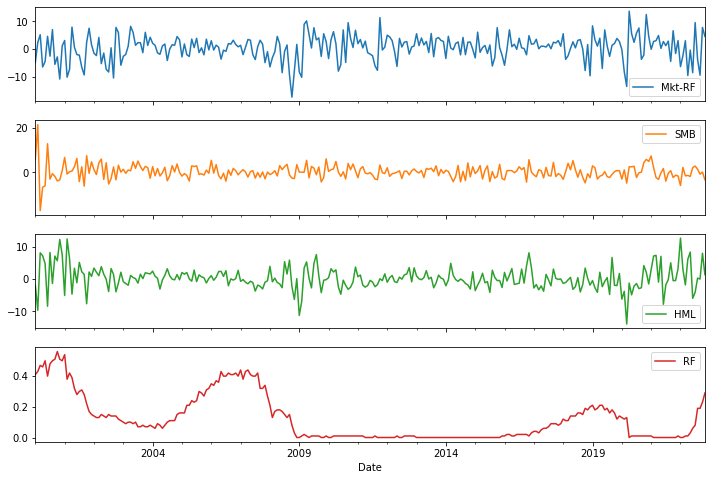

In [165]:
#ploting the data
ff_df.plot(subplots= True, figsize = (12,8))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

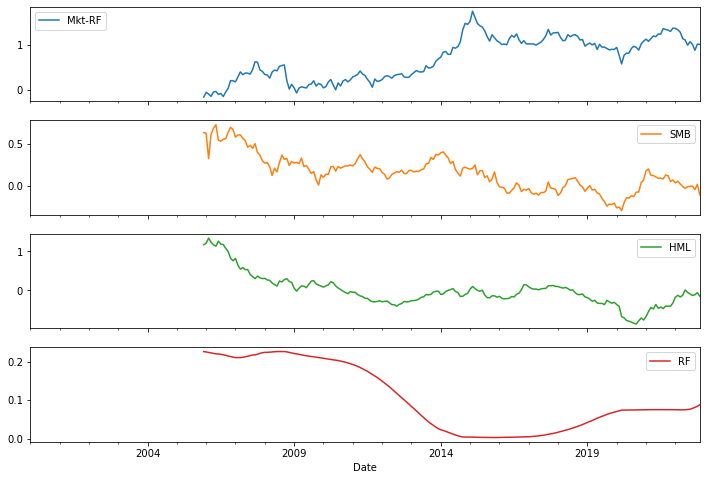

In [166]:
#smothing the curve of the plot
ff_df.rolling(72).mean().plot(subplots= True, figsize = (12,8))

In [167]:
#importing another Fama french mode, i.e. momentum factor model and ploting the same
ff_mom_df = pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq ='M',start = start).read()[0]

array([<AxesSubplot:xlabel='Date'>], dtype=object)

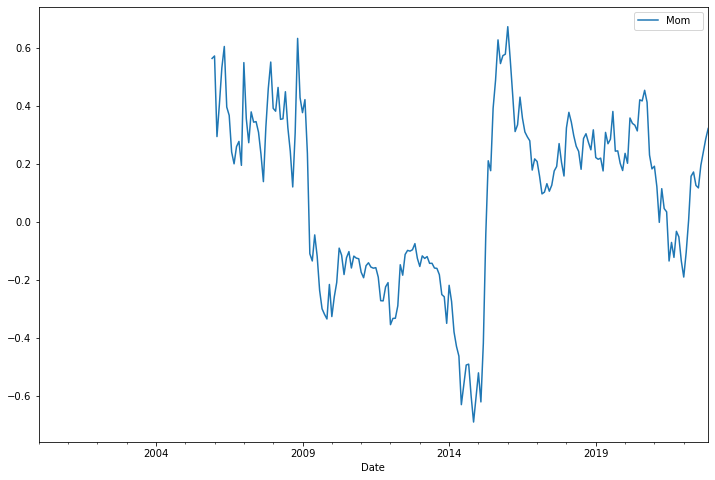

In [168]:
ff_mom_df.rolling(72).mean().plot(subplots= True, figsize = (12,8))

In [169]:
#creating a data frame of both fama french model and merging them

In [170]:
ff_df

,Mkt-RF,SMB,HML,RF
Date,,,,
2000-01,-4.74,5.79,-1.91,0.41
2000-02,2.45,21.42,-9.70,0.43
2000-03,5.20,-17.23,8.17,0.47
2000-04,-6.40,-6.68,7.26,0.46
2000-05,-4.42,-6.09,4.81,0.50
...,...,...,...,...
2022-07,9.57,2.81,-4.10,0.08
2022-08,-3.77,1.39,0.31,0.19
2022-09,-9.35,-0.82,0.03,0.19


In [171]:
ff_mom_df

,Mom
Date,
2000-01,1.92
2000-02,18.20
2000-03,-6.83
2000-04,-8.39
2000-05,-8.98
...,...
2022-07,-3.96
2022-08,2.10
2022-09,3.48


In [172]:
import pandas as pd
ffac_mergerd_df = pd.merge(ff_df,ff_mom_df, on="Date",how = 'inner', sort =True,copy=True,indicator = True, validate="one_to_one")

In [173]:
ffac_mergerd_df

,Mkt-RF,SMB,HML,RF,Mom,_merge
Date,,,,,,
2000-01,-4.74,5.79,-1.91,0.41,1.92,both
2000-02,2.45,21.42,-9.70,0.43,18.20,both
2000-03,5.20,-17.23,8.17,0.47,-6.83,both
2000-04,-6.40,-6.68,7.26,0.46,-8.39,both
2000-05,-4.42,-6.09,4.81,0.50,-8.98,both
...,...,...,...,...,...,...
2022-07,9.57,2.81,-4.10,0.08,-3.96,both
2022-08,-3.77,1.39,0.31,0.19,2.10,both
2022-09,-9.35,-0.82,0.03,0.19,3.48,both


In [174]:
#importing stock data for running the regression over risk of assets
BK_df = pandas_datareader.get_data_yahoo('BK', start = start)['Adj Close'].resample('M').ffill().pct.change()

TypeError: string indices must be integers

In [175]:
!pip install yfinance

In [176]:
import yfinance as yf

In [177]:
yf.pdr_override()

In [178]:
BK_df = pandas_datareader.data.get_data_yahoo('BK', start = start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%***********************]  1 of 1 completed


In [179]:
BK_df

Date
2000-01-31         NaN
2000-02-29   -0.181538
2000-03-31    0.250000
2000-04-30   -0.008823
2000-05-31    0.143074
                ...   
2022-08-31   -0.044409
2022-09-30   -0.072478
2022-10-31    0.103009
2022-11-30    0.090002
2022-12-31   -0.008279
Freq: M, Name: Adj Close, Length: 276, dtype: float64

In [180]:
BK_dataframe = BK_df.to_frame()

In [181]:
BK_dataframe

,Adj Close
Date,
2000-01-31,NaN
2000-02-29,-0.181538
2000-03-31,0.250000
2000-04-30,-0.008823
2000-05-31,0.143074
...,...
2022-08-31,-0.044409
2022-09-30,-0.072478
2022-10-31,0.103009


In [182]:
#BK_df.index.dtype
BK_dataframe.index.dtype

dtype('<M8[ns]')

In [183]:
ffac_mergerd_df.index.dtype

period[M]

In [184]:
#reareande the both data frame into same datatype as they both are different
BK_dataframe["str_data"]= BK_dataframe.index.astype(str)

In [185]:
BK_dataframe["dt_data"] = pd.to_datetime(BK_dataframe["str_data"]).dt.strftime('%Y-%m')

In [186]:
BK_dataframe["dt_data"].dtype

dtype('O')

In [187]:
ffac_mergerd_df["str_data"]= ffac_mergerd_df.index.astype(str)

In [188]:
ffac_mergerd_df['dt_data'] = pd.to_datetime(ffac_mergerd_df["str_data"]).dt.strftime('%Y-%m')

In [189]:
ffac_mergerd_df['dt_data'].dtype

dtype('O')

In [190]:
BK_ffac_merge_df = pd.merge(BK_dataframe,ffac_mergerd_df,on='dt_data',how = 'inner', sort =True,copy=True,indicator = False, validate="one_to_one")

In [191]:
BK_ffac_merge_df

,Adj Close,str_data_x,dt_data,Mkt-RF,SMB,HML,RF,Mom,_merge,str_data_y
0,NaN,2000-01-31,2000-01,-4.74,5.79,-1.91,0.41,1.92,both,2000-01
1,-0.181538,2000-02-29,2000-02,2.45,21.42,-9.70,0.43,18.20,both,2000-02
2,0.250000,2000-03-31,2000-03,5.20,-17.23,8.17,0.47,-6.83,both,2000-03
3,-0.008823,2000-04-30,2000-04,-6.40,-6.68,7.26,0.46,-8.39,both,2000-04
4,0.143074,2000-05-31,2000-05,-4.42,-6.09,4.81,0.50,-8.98,both,2000-05
...,...,...,...,...,...,...,...,...,...,...
270,0.050899,2022-07-31,2022-07,9.57,2.81,-4.10,0.08,-3.96,both,2022-07
271,-0.044409,2022-08-31,2022-08,-3.77,1.39,0.31,0.19,2.10,both,2022-08
272,-0.072478,2022-09-30,2022-09,-9.35,-0.82,0.03,0.19,3.48,both,2022-09
273,0.103009,2022-10-31,2022-10,7.83,0.10,8.05,0.23,3.89,both,2022-10


In [192]:
BK_ffac_merge_df.drop(columns=['str_data_x', 'str_data_y'], inplace = True)

In [193]:
BK_ffac_merge_df.rename(columns = {'Adj Close':'BK'}, inplace = True)

In [194]:
BK_ffac_merge_df

,BK,dt_data,Mkt-RF,SMB,HML,RF,Mom,_merge
0,NaN,2000-01,-4.74,5.79,-1.91,0.41,1.92,both
1,-0.181538,2000-02,2.45,21.42,-9.70,0.43,18.20,both
2,0.250000,2000-03,5.20,-17.23,8.17,0.47,-6.83,both
3,-0.008823,2000-04,-6.40,-6.68,7.26,0.46,-8.39,both
4,0.143074,2000-05,-4.42,-6.09,4.81,0.50,-8.98,both
...,...,...,...,...,...,...,...,...
270,0.050899,2022-07,9.57,2.81,-4.10,0.08,-3.96,both
271,-0.044409,2022-08,-3.77,1.39,0.31,0.19,2.10,both
272,-0.072478,2022-09,-9.35,-0.82,0.03,0.19,3.48,both
273,0.103009,2022-10,7.83,0.10,8.05,0.23,3.89,both


In [195]:
#converting BK returns to % as RF(riskfree) and subtract riskfree rate to run a regression
BK_ffac_merge_df['BK_RF']= BK_ffac_merge_df['BK']*100-BK_ffac_merge_df['RF']

In [196]:
BK_ffac_merge_df

,BK,dt_data,Mkt-RF,SMB,HML,RF,Mom,_merge,BK_RF
0,NaN,2000-01,-4.74,5.79,-1.91,0.41,1.92,both,NaN
1,-0.181538,2000-02,2.45,21.42,-9.70,0.43,18.20,both,-18.583808
2,0.250000,2000-03,5.20,-17.23,8.17,0.47,-6.83,both,24.529975
3,-0.008823,2000-04,-6.40,-6.68,7.26,0.46,-8.39,both,-1.342296
4,0.143074,2000-05,-4.42,-6.09,4.81,0.50,-8.98,both,13.807368
...,...,...,...,...,...,...,...,...,...
270,0.050899,2022-07,9.57,2.81,-4.10,0.08,-3.96,both,5.009906
271,-0.044409,2022-08,-3.77,1.39,0.31,0.19,2.10,both,-4.630865
272,-0.072478,2022-09,-9.35,-0.82,0.03,0.19,3.48,both,-7.437769
273,0.103009,2022-10,7.83,0.10,8.05,0.23,3.89,both,10.070875


In [197]:
BK_ffac_merge_df.dropna(axis= 0, inplace= True)

In [198]:
#OLS -Ordinarly squared , stats model is used for regression of the factor exposure 
from statsmodels.api import OLS

In [199]:
list(BK_ffac_merge_df)

['BK', 'dt_data', 'Mkt-RF', 'SMB', 'HML', 'RF', 'Mom   ', '_merge', 'BK_RF']

In [200]:
# seting up OLS model and its varialbles, BK_ffac_merge_df['BK_RF'] is a Y variable i.e dependent variable. 
results = OLS(BK_ffac_merge_df['BK_RF'],BK_ffac_merge_df[['Mkt-RF','SMB', 'HML','Mom   ']], missing = 'drop').fit()

In [201]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  BK_RF   R-squared (uncentered):                   0.494
Model:                            OLS   Adj. R-squared (uncentered):              0.487
Method:                 Least Squares   F-statistic:                              65.91
Date:                Sat, 31 Dec 2022   Prob (F-statistic):                    7.67e-39
Time:                        20:03:09   Log-Likelihood:                         -851.80
No. Observations:                 274   AIC:                                      1712.
Df Residuals:                     270   BIC:                                      1726.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.0386      0.080     12.925      0.000       0.880       1.197
SMB           -0.4370      0.110     -3.968      0.000      -0.654      -0.220
HML            0.4853      0.098      4.943      0.000       0.292       0.679
Mom           -0.1354      0.071     -1.918      0.056      -0.274       0.004
==============================================================================
Omnibus:                       20.905   Durbin-Watson:                   2.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.323
Skew:                          -0.031   Prob(JB):                     7.26e-17
Kurtosis:                       5.551   Cond. No.                         2.09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
import statsmodels.tools

In [210]:
BK_ffac_merge_df_constant = statsmodels.tools.add_constant(BK_ffac_merge_df, prepend = True)

In [211]:
BK_ffac_merge_df_constant

,const,BK,dt_data,Mkt-RF,SMB,HML,RF,Mom,_merge,BK_RF
1,1.0,-0.181538,2000-02,2.45,21.42,-9.70,0.43,18.20,both,-18.583808
2,1.0,0.250000,2000-03,5.20,-17.23,8.17,0.47,-6.83,both,24.529975
3,1.0,-0.008823,2000-04,-6.40,-6.68,7.26,0.46,-8.39,both,-1.342296
4,1.0,0.143074,2000-05,-4.42,-6.09,4.81,0.50,-8.98,both,13.807368
5,1.0,-0.009320,2000-06,4.64,12.85,-8.43,0.40,16.60,both,-1.332012
...,...,...,...,...,...,...,...,...,...,...
270,1.0,0.050899,2022-07,9.57,2.81,-4.10,0.08,-3.96,both,5.009906
271,1.0,-0.044409,2022-08,-3.77,1.39,0.31,0.19,2.10,both,-4.630865
272,1.0,-0.072478,2022-09,-9.35,-0.82,0.03,0.19,3.48,both,-7.437769
273,1.0,0.103009,2022-10,7.83,0.10,8.05,0.23,3.89,both,10.070875


In [212]:
results = OLS(BK_ffac_merge_df_constant['BK_RF'],BK_ffac_merge_df_constant[['Mkt-RF','SMB', 'HML','Mom   ']], missing = 'drop').fit()

In [213]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  BK_RF   R-squared (uncentered):                   0.494
Model:                            OLS   Adj. R-squared (uncentered):              0.487
Method:                 Least Squares   F-statistic:                              65.91
Date:                Sat, 31 Dec 2022   Prob (F-statistic):                    7.67e-39
Time:                        20:31:12   Log-Likelihood:                         -851.80
No. Observations:                 274   AIC:                                      1712.
Df Residuals:                     270   BIC:                                      1726.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.0386      0.080     12.925      0.000       0.880       1.197
SMB           -0.4370      0.110     -3.968      0.000      -0.654      -0.220
HML            0.4853      0.098      4.943      0.000       0.292       0.679
Mom           -0.1354      0.071     -1.918      0.056      -0.274       0.004
==============================================================================
Omnibus:                       20.905   Durbin-Watson:                   2.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.323
Skew:                          -0.031   Prob(JB):                     7.26e-17
Kurtosis:                       5.551   Cond. No.                         2.09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# as per this regression, BK has a negative significance exposure to the size, Has insignificant exposure to value(HML) and momentum.